In [2]:
import pandas

In [10]:
messages = pandas.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['labels','message'])

In [11]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Some explanatory analysis
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('labels').describe()

message
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [19]:
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


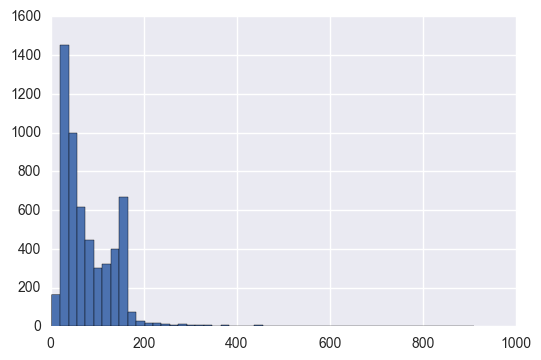

In [25]:
messages['length'].hist(bins = 50)

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [30]:
# find the max message
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CFBB2B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D15AA58>], dtype=object)

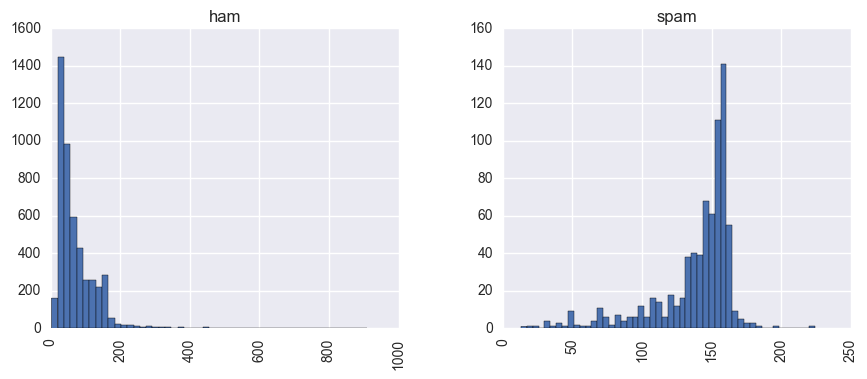

In [31]:
messages.hist(column='length', by='labels', bins=50, figsize=(10,4))

In [59]:
# We need numerical features for classification problem
# Text pre-processing
import string


In [60]:
mess = 'Sample message! Notice: It has a semi colon'

In [61]:
nopunc = [char for char in mess if char not in string.punctuation]

In [62]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice It has a semi colon'

In [63]:
from nltk.corpus import stopwords

In [64]:
stopwords.words('english')[:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [65]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'a', 'semi', 'colon']

In [67]:
clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_word

['Sample', 'message', 'Notice', 'semi', 'colon']

In [68]:
# so this cleaned up the stop words in my string, summing this as a function
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [69]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [71]:
# Tokenize the messages
messages['message'].head(5).apply(text_process) # caleed lemas

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [72]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
# Vectorize the tokens
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_process)


In [74]:
bow_transformer.fit(messages['message'])

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CountVectorizer(analyzer=<function text_process at 0x000000000EE63C18>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [76]:
message4 = messages['message'][3]
print message4

U dun say so early hor... U c already then say...


In [79]:
bow4 = bow_transformer.transform([message4])
print bow4

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [80]:
messages_bow = bow_transformer.transform(messages['message'])

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [82]:
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [84]:
from sklearn.feature_extraction.text import TfidfTransformer

In [86]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [88]:
tfidf4 = tfidf_transformer.transform(bow4)

In [89]:
print tfidf4

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [90]:
messages_tdidf = tfidf_transformer.transform(messages_bow)

In [92]:
print messages_tdidf.shape

(5572, 11425)


In [93]:
# Machine Learning
from sklearn.naive_bayes import MultinomialNB


In [97]:
spam_detect_model = MultinomialNB().fit(messages_tdidf,messages['labels'])

In [100]:
print 'Predicted:', spam_detect_model.predict(tfidf4)[0]
print 'Expected:', messages['labels'][3]

all_predictions = spam_detect_model.predict(messages_tdidf)
print all_predictions

Predicted: ham
Expected: ham
['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [101]:
from sklearn.metrics import classification_report

print classification_report(messages['labels'], all_predictions )

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [ ]:
# Average 98% accuracy! not bad! :)